In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Data Loading

In [2]:
from tensorflow import keras


fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
print("Train Shape: ", x_train.shape)
print("Train Labels: ", len(y_train))
print("Test Shape: ", x_test.shape)
print("Test Labels: ", len(y_test))

Train Shape:  (60000, 28, 28)
Train Labels:  60000
Test Shape:  (10000, 28, 28)
Test Labels:  10000


- x_train.shape nos mostra que temos 60.000 imagens, cada uma com 28x28 pixels.
- y_train contém os 60.000 rótulos (respostas) para essas imagens. Cada rótulo é um número de 0 a 9.

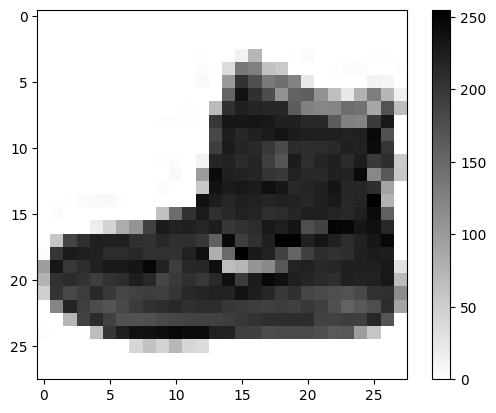

In [4]:
# Vizualizar imagens
plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

## Normalize Data

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

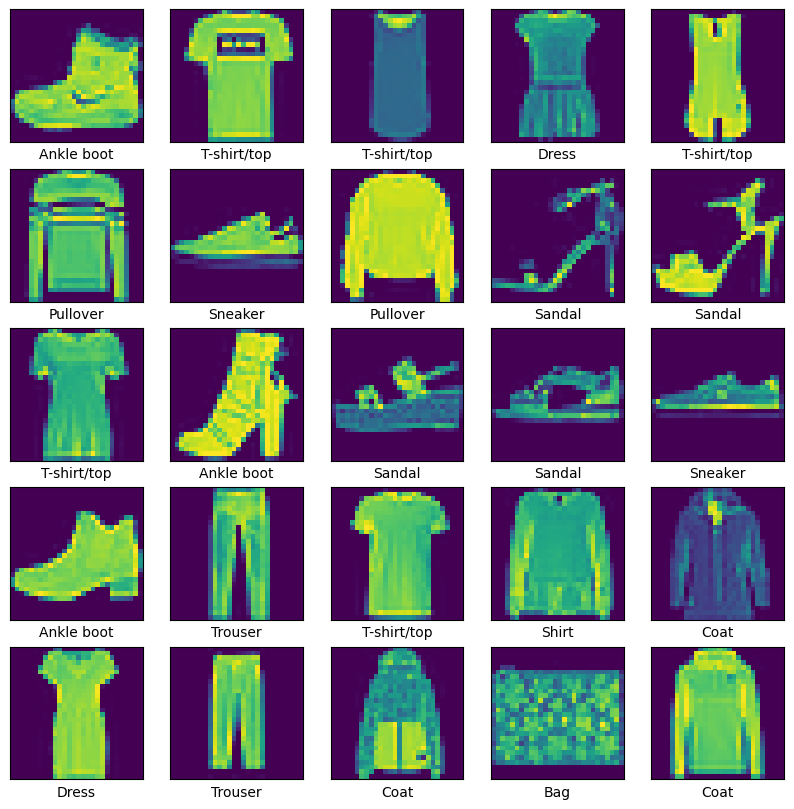

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Model - Keras

- **Flatten:** Transforma a matriz 2D da imagem (28x28 pixels) em um vetor 1D (de 784 pixels). É a camada de entrada.

- **Dense (128):** Uma camada neural "densa" ou "totalmente conectada" com 128 neurônios. A função de ativação relu <br>
é uma escolha padrão e eficiente.

- **Dense (10):** A camada de saída. Ela precisa ter 10 neurônios, um para cada uma das nossas classes. A função de <br>
ativação softmax transforma a saída dos neurônios em uma distribuição de probabilidade, nos dizendo qual a chance de<br>
a imagem pertencer a cada classe.

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # Camada de entrada
    keras.layers.Dense(128, activation='relu'),# Camada oculta
    keras.layers.Dense(10, activation='softmax') # Camada de saída
])

c:\Users\carlo\OneDrive\Área de Trabalho\Faculdade\ML\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


- **optimizer='adam':** O algoritmo que ajusta os pesos da rede para minimizar o erro. 'Adam' é um o<br>
    timizador muito popular e eficaz.

- **loss='sparse_categorical_crossentropy':** A função que mede o quão errado o modelo está. Esta é a <br>
escolha correta para problemas de classificação com múltiplas classes onde os rótulos são números inteiros.

- **metrics=['accuracy']:** A métrica que queremos monitorar durante o treino. Neste caso, a acurácia.

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']          
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### Training

Usamos o método fit() para iniciar o treinamento. Passamos os dados de treino (x_train, y_train) e definimos<br>
o número de epochs (quantas vezes o modelo verá o dataset completo).

In [9]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8245 - loss: 0.4935 - val_accuracy: 0.8331 - val_loss: 0.4624
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8649 - loss: 0.3719 - val_accuracy: 0.8622 - val_loss: 0.3794
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8784 - loss: 0.3334 - val_accuracy: 0.8704 - val_loss: 0.3619
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8851 - loss: 0.3105 - val_accuracy: 0.8794 - val_loss: 0.3441
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8918 - loss: 0.2932 - val_accuracy: 0.8695 - val_loss: 0.3762
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8979 - loss: 0.2774 - val_accuracy: 0.8748 - val_loss: 0.3485
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9002 - loss: 0.2661 - val_accuracy: 0.8778 - val_loss: 0.3451
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9051 - loss: 0.2547 - 

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(round(test_acc,3))

313/313 - 0s - 2ms/step - accuracy: 0.8830 - loss: 0.3432
0.883


## Model - Keras CNN

Rede Neural Convolucional (CNN). Em vez de achatar a imagem, as CNNs a processam em seu formato 2D, o que<br>
permite que elas aprendam sobre as relações espaciais entre os pixels (bordas, texturas, formas, etc.).

In [21]:
model_cnn = keras.Sequential([
    keras.layers.Input(shape=(28,28,1)), # Formato da entrada
    
    # 1ª Camada Covolucional (aprende 32 features)
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)), # Reduz o tamanho da imagem
    
    # 2ª Camada Covolucional (aprende 64 features mais complexas)
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    # Achata-se o resultado para conectar a camadas mais densas
    keras.layers.Flatten(),
    
    # Camadas densas 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

**Camadas Densas**

The first line creates a dense (fully connected) layer with 128 neurons and uses the ReLU activation function. This layer <br>
helps the network learn complex patterns by introducing non-linearity.

The second line adds a Dropout layer with a rate of 0.5. Dropout randomly sets half of the input units to zero during<br>
training, which helps prevent overfitting by making the model less reliant on specific neurons.

The third line creates another dense layer with 10 neurons and uses the softmax activation function. This is typically<br>
the output layer for a classification problem with 10 classes. The softmax function converts the outputs into <br>
probabilities, indicating the likelihood that the input belongs to each class.

### Training

In [22]:
x_train_cnn = x_train[..., np.newaxis]
x_test_cnn = x_test[..., np.newaxis]

print("Novo formato das imagens de treino:", x_train_cnn.shape)
print("Novo formato das imagens de teste:", x_test_cnn.shape)

Novo formato das imagens de treino: (60000, 28, 28, 1)
Novo formato das imagens de teste: (10000, 28, 28, 1)


In [23]:
history_cnn = model_cnn.fit(
    x_train_cnn, y_train,
    epochs = 10,
    validation_data=(x_test_cnn, y_test) 
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7863 - loss: 0.5825 - val_accuracy: 0.8604 - val_loss: 0.3847
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8566 - loss: 0.3932 - val_accuracy: 0.8796 - val_loss: 0.3215
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8755 - loss: 0.3388 - val_accuracy: 0.8918 - val_loss: 0.2970
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8863 - loss: 0.3085 - val_accuracy: 0.8928 - val_loss: 0.2877
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8977 - loss: 0.2824 - val_accuracy: 0.8970 - val_loss: 0.2765
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9034 - loss: 0.2614 - val_accuracy: 0.9028 - val_loss: 0.2648
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9089 - loss: 0.2465 - val_accuracy: 0.9061 - val_loss: 0.2622
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9135 - lo

In [28]:
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(x_test_cnn, y_test, verbose=2)
print(round(test_acc_cnn,3))

313/313 - 1s - 3ms/step - accuracy: 0.9089 - loss: 0.2676
0.909
